In [9]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.25.1
Matplotlib version 3.1.1


In [4]:
# file path of csv file
Location = r'/Users/louiseplacidet/Desktop/PIR/Data/data_spikes/E18KABaseline_Bcut.txt'

# create dataframe
df = pd.read_csv(Location, sep='\t',skiprows=[0,1,3] , index_col='%t           ')
df

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,El 21,El 31,El 41,El 22,El 32,El 42,El 23,El 33,El 43
%t,,,,,,,,,
0.00,-2.84,-1.02,-7.05,-3.18,-3.41,-3.30,-2.27,-1.36,-2.95
0.04,-3.41,-3.30,-8.07,-2.39,-3.75,-2.27,-2.50,-2.27,-0.68
0.08,-4.77,-3.86,-5.80,-1.70,-2.73,-0.34,-2.95,-2.27,0.11
0.12,-5.00,-3.41,-4.32,-2.27,-2.84,0.45,-4.43,-3.64,-1.48
0.16,-3.30,-4.20,-4.09,-1.93,-4.55,1.14,-5.57,-3.52,-1.82
...,...,...,...,...,...,...,...,...,...
301799.80,0.68,0.68,0.23,-0.23,-1.25,3.07,-0.11,0.68,0.45
301799.84,-1.02,-1.14,0.91,0.23,-2.39,2.39,-2.50,1.82,-0.45
301799.88,-1.14,-3.41,0.91,-0.11,-3.41,2.05,-2.50,2.95,-1.36


In [5]:
list(df.columns.values)

['El 21       ',
 'El 31       ',
 'El 41       ',
 'El 22       ',
 'El 32       ',
 'El 42       ',
 'El 23       ',
 'El 33       ',
 'El 43       ']

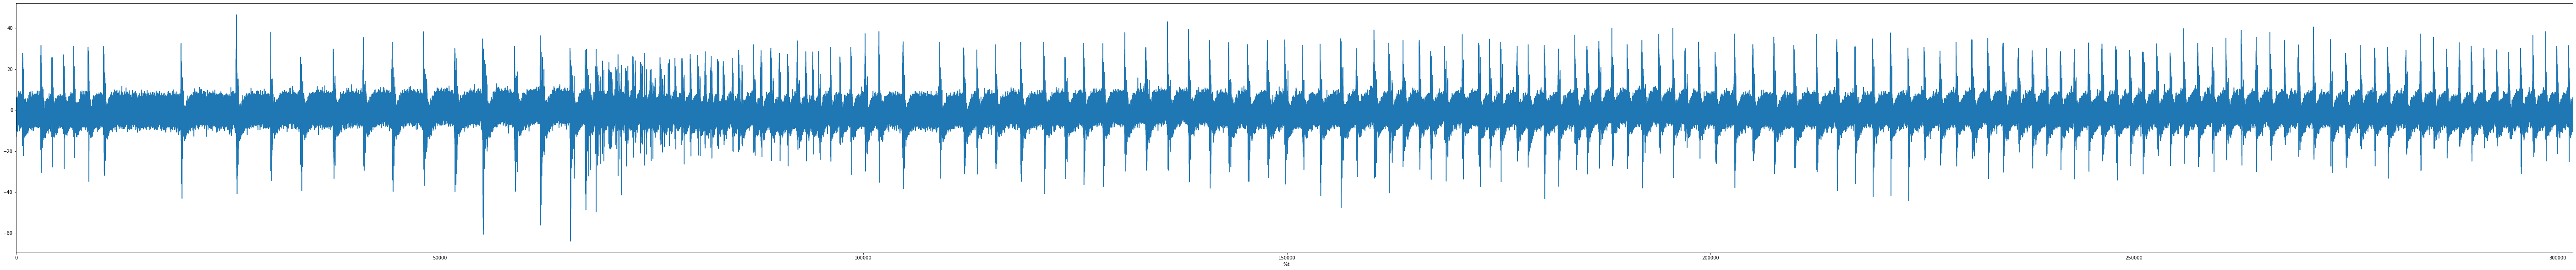

In [6]:
df['El 21       '].plot(figsize=(100,10))

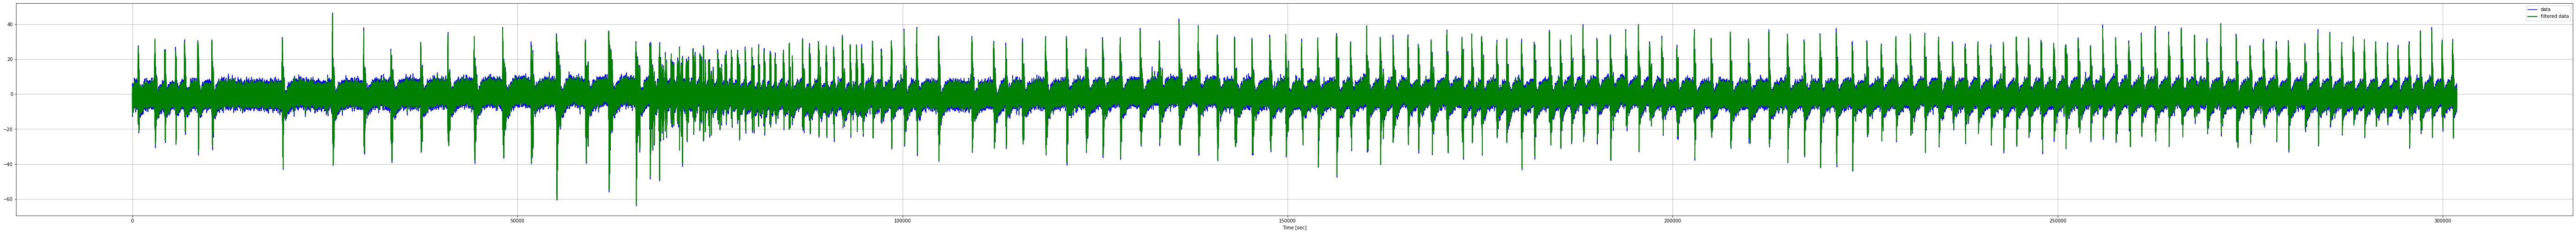

In [22]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 2
fs = 25000       # sample rate, Hz
cutoff = 3000  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(df['El 21       '], cutoff, fs, order)

plt.figure(figsize = (100,20))
plt.subplot(2, 1, 2)
plt.plot(df.index, df['El 21       '], 'b-', label='data')
plt.plot(df.index, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

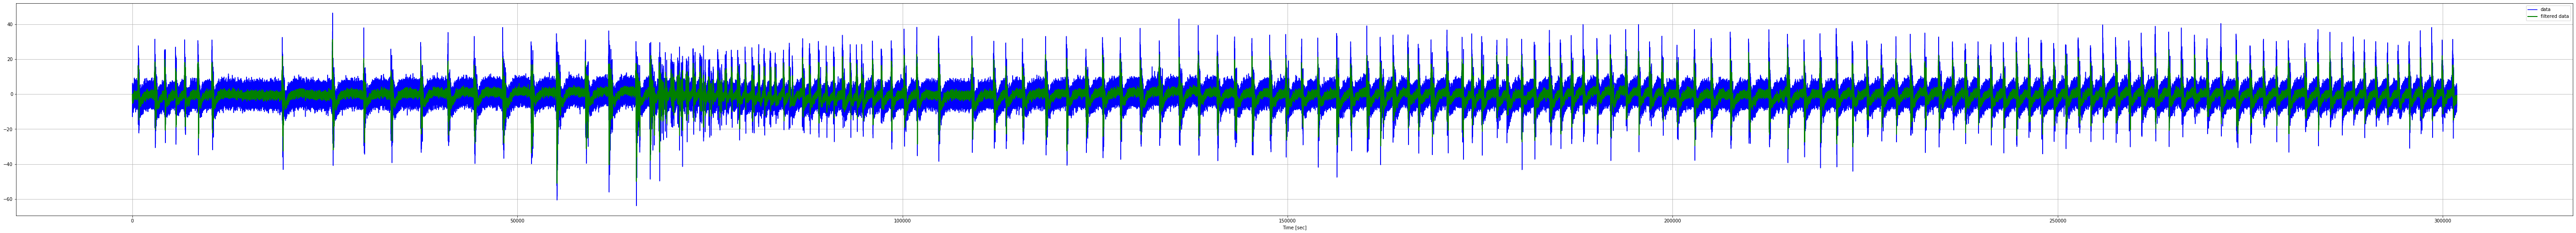

In [21]:
def butter_highpass(cutoff, fs, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=2):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 2
fs = 25000       # sample rate, Hz
cutoff = 200  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_highpass(cutoff, fs, order)

# Filter the data, and plot both the original and filtered signals.
y = butter_highpass_filter(df['El 21       '], cutoff, fs, order)

plt.figure(figsize = (100,20))
plt.subplot(2, 1, 2)
plt.plot(df.index, df['El 21       '], 'b-', label='data')
plt.plot(df.index, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

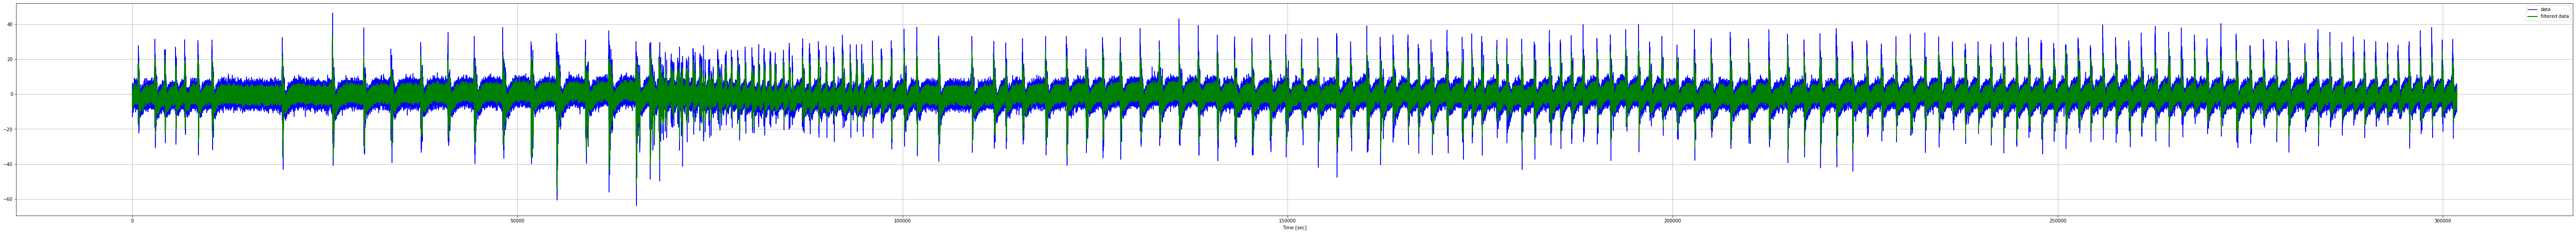

In [30]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 2
fs = 25000       # sample rate, Hz
highcut = 3000  # desired cutoff frequency of the filter, Hz
lowcut = 200

cutoff = np.ndarray([cutoff_low, cutoff_high])

# Get the filter coefficients so we can check its frequency response.
b, a = butter_bandpass(lowcut, highcut, fs, order)

# Filter the data, and plot both the original and filtered signals.
y = butter_bandpass_filter(df['El 21       '], lowcut, highcut, fs, order)

plt.figure(figsize = (100,20))
plt.subplot(2, 1, 2)
plt.plot(df.index, df['El 21       '], 'b-', label='data')
plt.plot(df.index, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

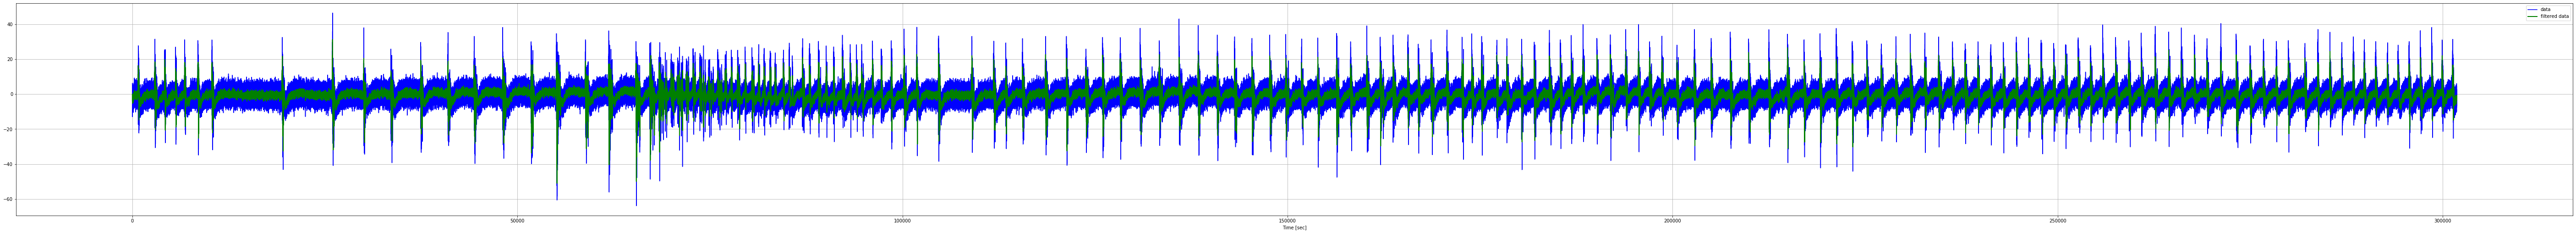

In [31]:

# Filter requirements.
order = 2
fs = 25000       # sample rate, Hz
highcut = 3000  # desired cutoff frequency of the filter, Hz
lowcut = 200

cutoff = np.ndarray([cutoff_low, cutoff_high])

b, a = butter_highpass(lowcut, fs, order)
y = butter_highpass_filter(df['El 21       '], lowcut, fs, order)

b1, a1 = b, a = butter_lowpass(highcut, fs, order)

y1 = butter_lowpass_filter(y, highcut, fs, order)


plt.figure(figsize = (100,20))
plt.subplot(2, 1, 2)
plt.plot(df.index, df['El 21       '], 'b-', label='data')
plt.plot(df.index, y1, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()